In [1]:
#What age groups appeared to have the highest vaccination rates?
#Did the majority of the countries provided in this dataset have the same age groups that had the 
#highest vaccination rates? Were there any that deviated from the norm?

#Did age group affect the total number of fully vaccinated, boosters or partial 
#vaccinations?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np


resources = "Resources"
vac_agegroup_csv = "vaccinations-by-age-group.csv"

file_path = f"../{resources}/{vac_agegroup_csv}"
vac_agegroup = pd.read_csv(file_path)

print(vac_agegroup.shape)
vac_agegroup.head()

(72540, 6)


,location,date,age_group,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,people_with_booster_per_hundred
0,Argentina,2020-01-01,100+,0.0,0.0,0.0
1,Argentina,2020-01-01,12-17,0.0,0.0,0.0
2,Argentina,2020-01-01,18-29,0.0,0.0,0.0
3,Argentina,2020-01-01,3-11,0.0,0.0,0.0
4,Argentina,2020-01-01,30-39,0.0,0.0,0.0


In [3]:
print(vac_agegroup['location'].nunique())
locations = vac_agegroup['location'].unique()
locations

38


array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Bulgaria',
       'Canada', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia',
       'Finland', 'France', 'Hong Kong', 'Hungary', 'Iceland', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Jersey', 'Latvia', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Norway',
       'Peru', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia',
       'Spain', 'Sweden', 'Switzerland', 'Uruguay'], dtype=object)

In [4]:
print(vac_agegroup['age_group'].nunique())
age_groups = vac_agegroup['age_group'].unique()
age_groups

46


array(['100+', '12-17', '18-29', '3-11', '30-39', '40-49', '50-59',
       '60-69', '70-79', '80-89', '90-99', '16-19', '20-29', '90+',
       '12-15', '5-11', '0-4', '15-17', '18-24', '25-49', '5-9', '80+',
       '10-14', '0-17', '0-15', '16-69', '18-69', '0-19', '12-64', '65+',
       '0-5', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79',
       '16-17', '0-9', '10-19', '25-34', '35-44', '45-54', '55-64',
       '65-74', '75+'], dtype=object)

In [5]:
# STANDARD_AGE_GROUPS_BE = ['0-17', '18-24', '25-49', '50-59', '60-69', '70-79', '80+']
# STANDARD_AGE_GROUPS_AT = ['0-4','10-14','15-17','18-24','25-49','5-9','50-59','60-69','70-79','80+']
# STANDARD_AGE_GROUPS_AU = ['12-15','16-19','20-29','30-39','40-49','5-11','50-59','60-69','70-79','80-89','90+']
# STANDARD_AGE_GROUPS_FI = ['10-14','15-17','18-24','25-49','5-9','50-59','60-69','70-79','80+']
# STANDARD_AGE_GROUPS_AR = ['100+','12-17','18-29','3-11','30-39','40-49','50-59','60-69','70-79','80-89','90-99']
# STANDARD_AGE_GROUPS_CA = ['0-15','0-4','12-17','16-69','18-29','18-69','30-39','40-49','5-11','50-59','60-69','70-79','80+']
# STANDARD_AGE_GROUPS_HK = ['0-19','20-29','30-39','40-49','50-59','60-69','70-79','80+']
# STANDARD_AGE_GROUPS_JA = ['0-5', '12-64', '5-11', '65+']
# STANDARD_AGE_GROUPS_JE = ['12-15','16-17','18-29','30-39','40-49','5-11','50-54','55-59','60-64','65-69','70-74','75-79','80+']
# STANDARD_AGE_GROUPS_SE = ['15-17', '18-24', '25-49', '50-59', '60-69', '70-79', '80+']
# STANDARD_AGE_GROUPS_SW = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80+']
# STANDARD_AGE_GROUPS_UY = ['12-17','18-24','25-34','35-44','45-54','55-64','65-74','75+']

In [6]:
def mapper(age_group):
    if '-' in age_group:
        age_range = age_group.split('-')
        lower_age = int(age_range[0])
        upper_age = int(age_range[1])
        if lower_age <= 17 and upper_age <= 17:
            return '0-17'
        elif lower_age >= 18 and upper_age <= 39:
            return '18-39'
        elif lower_age >= 40 and upper_age <= 59:
            return '40-59'
        else:
            return '60+'
    else:
        if int(age_group[:2]) == 10 or int(age_group[:2]) >= 60:
            return '60+'

In [7]:
all_age_groups = ['0-17', '18-24', '25-49', '50-59', '60-69', '70-79', '80+','0-4','10-14','15-17','18-24','25-49','5-9','50-59','60-69','70-79','80+'
,'12-15','16-19','20-29','30-39','40-49','5-11','50-59','60-69','70-79','80-89','90+','10-14','15-17','18-24','25-49','5-9','50-59','60-69','70-79','80+'
,'100+','12-17','18-29','3-11','30-39','40-49','50-59','60-69','70-79','80-89','90-99','0-15','0-4','12-17','16-69','18-29','18-69','30-39','40-49','5-11','50-59','60-69','70-79','80+'
,'0-19','20-29','30-39','40-49','50-59','60-69','70-79','80+','0-5', '12-64', '5-11', '65+',
'12-15','16-17','18-29','30-39','40-49','5-11','50-54','55-59','60-64','65-69','70-74','75-79','80+',
'15-17', '18-24', '25-49', '50-59', '60-69', '70-79', '80+',
'0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80+','12-17','18-24','25-34','35-44','45-54','55-64','65-74','75+']
len(all_age_groups)

110

In [8]:
original_age_group = list(set(all_age_groups))
print(original_age_group)

['55-59', '80-89', '0-5', '50-54', '25-34', '18-69', '30-39', '55-64', '65+', '16-19', '0-17', '5-11', '35-44', '60-64', '90+', '70-79', '12-15', '75+', '16-69', '12-17', '90-99', '3-11', '45-54', '16-17', '10-19', '18-24', '25-49', '80+', '5-9', '100+', '75-79', '65-69', '0-19', '18-29', '20-29', '0-4', '60-69', '65-74', '0-15', '70-74', '50-59', '15-17', '40-49', '12-64', '0-9', '10-14']


In [9]:
new_age_group = [mapper(age) for age in original_age_group]
print(new_age_group)

['40-59', '60+', '0-17', '40-59', '18-39', '60+', '18-39', '60+', '60+', '60+', '0-17', '0-17', '60+', '60+', '60+', '60+', '0-17', '60+', '60+', '0-17', '60+', '0-17', '40-59', '0-17', '60+', '18-39', '60+', '60+', '0-17', '60+', '60+', '60+', '60+', '18-39', '18-39', '0-17', '60+', '60+', '0-17', '60+', '40-59', '0-17', '40-59', '60+', '0-17', '0-17']


In [10]:
df = vac_agegroup.copy()

In [11]:
df['Grouped_Age'] = df['age_group'].map(dict(zip(original_age_group, new_age_group)))

In [12]:
df[['age_group', 'Grouped_Age']]

,age_group,Grouped_Age
0,100+,60+
1,12-17,0-17
2,18-29,18-39
3,3-11,0-17
4,30-39,18-39
...,...,...
72535,35-44,60+
72536,45-54,40-59
72537,55-64,60+
72538,65-74,60+


In [13]:
df['Grouped_Age'].unique()

array(['60+', '0-17', '18-39', '40-59'], dtype=object)

In [14]:
vac_per_country_max= df.groupby(['location','Grouped_Age'])[['people_fully_vaccinated_per_hundred','people_vaccinated_per_hundred', 'people_with_booster_per_hundred']].max()

In [15]:
vac_per_country_max.reset_index(inplace=True)
vac_per_country_max

,location,Grouped_Age,people_fully_vaccinated_per_hundred,people_vaccinated_per_hundred,people_with_booster_per_hundred
0,Argentina,0-17,68.01,92.05,44.05
1,Argentina,18-39,90.03,100.02,78.05
2,Argentina,40-59,90.64,99.45,117.12
3,Argentina,60+,92.01,113.85,162.90
4,Australia,0-17,80.45,84.97,NaN
...,...,...,...,...,...
144,Switzerland,60+,NaN,93.09,NaN
145,Uruguay,0-17,6.73,56.50,NaN
146,Uruguay,18-39,62.59,74.49,NaN
147,Uruguay,40-59,78.39,84.00,NaN


In [16]:
vac_per_country_rates= df.groupby(['location','Grouped_Age'])[['people_fully_vaccinated_per_hundred','people_vaccinated_per_hundred', 'people_with_booster_per_hundred']].mean()
vac_per_country_rates.reset_index(inplace=True)
vac_per_country_rates

,location,Grouped_Age,people_fully_vaccinated_per_hundred,people_vaccinated_per_hundred,people_with_booster_per_hundred
0,Argentina,0-17,34.212455,47.780044,11.560745
1,Argentina,18-39,49.967750,60.857690,28.660366
2,Argentina,40-59,50.771840,63.074033,45.595124
3,Argentina,60+,52.452394,66.297962,55.493283
4,Australia,0-17,61.180133,72.344335,NaN
...,...,...,...,...,...
144,Switzerland,60+,NaN,68.340921,NaN
145,Uruguay,0-17,0.070842,1.153474,NaN
146,Uruguay,18-39,7.557368,15.727737,NaN
147,Uruguay,40-59,18.460842,37.437579,NaN


In [17]:
clean_df = vac_per_country_rates.dropna()
clean_df

,location,Grouped_Age,people_fully_vaccinated_per_hundred,people_vaccinated_per_hundred,people_with_booster_per_hundred
0,Argentina,0-17,34.212455,47.780044,11.560745
1,Argentina,18-39,49.967750,60.857690,28.660366
2,Argentina,40-59,50.771840,63.074033,45.595124
3,Argentina,60+,52.452394,66.297962,55.493283
8,Austria,0-17,24.246686,27.088536,8.415588
...,...,...,...,...,...
136,Spain,60+,79.136259,85.201084,53.702185
137,Sweden,0-17,57.722031,64.848281,3.360703
138,Sweden,18-39,58.691944,65.171389,23.853264
139,Sweden,40-59,72.737292,77.340208,46.882292


In [18]:
vac_per_country_rates_df = clean_df[['location', 'Grouped_Age', 'people_fully_vaccinated_per_hundred']]
vac_per_country_rates_df

,location,Grouped_Age,people_fully_vaccinated_per_hundred
0,Argentina,0-17,34.212455
1,Argentina,18-39,49.967750
2,Argentina,40-59,50.771840
3,Argentina,60+,52.452394
8,Austria,0-17,24.246686
...,...,...,...
136,Spain,60+,79.136259
137,Sweden,0-17,57.722031
138,Sweden,18-39,58.691944
139,Sweden,40-59,72.737292


In [19]:
# Initialize a dictionary to store the age group with the most vaccinations for each country
max_fully_vac_by_country = {}

# Iterate over each unique country in the dataset
for country in vac_per_country_rates['location'].unique():
    if country != 'Switzerland':
        
        # Filter the data for the current country
        country_data = vac_per_country_rates[vac_per_country_rates['location'] == country]
        
        # Initialize variables to store the maximum vaccinations and corresponding age group
        max_vaccinations = 0
        max_age_group = None
        
        # Iterate over each unique age group in the country data
        for age_group in country_data['Grouped_Age'].unique():
            # Calculate the total vaccinations for the current age group
            total_vaccinations = country_data[country_data['Grouped_Age'] == age_group]['people_fully_vaccinated_per_hundred'].max()
            
            # Check if the total vaccinations for the current age group is greater than the current maximum
            if total_vaccinations > max_vaccinations:
                max_vaccinations = total_vaccinations
                max_age_group = age_group
        
        # Store the age group with the most vaccinations for the current country in the dictionary
        max_fully_vac_by_country[country] = max_age_group
    # Print the results
#for country, age_group in max_vaccinations_by_country.items():
    #print(f"Country: {country},  {age_group}")


In [20]:
index_values = ['age_group_max']
avg_fully_vac_by_country_df = pd.DataFrame(max_fully_vac_by_country, index=index_values)
avg_fully_vac_by_country_df

,Argentina,Australia,Austria,Belgium,Bulgaria,Canada,Croatia,Cyprus,Czechia,Denmark,...,Norway,Peru,Poland,Portugal,Romania,Slovakia,Slovenia,Spain,Sweden,Uruguay
age_group_max,60+,60+,60+,60+,40-59,40-59,40-59,60+,60+,60+,...,60+,60+,60+,60+,40-59,60+,60+,60+,60+,60+


In [21]:
fully_vac_df = avg_fully_vac_by_country_df.transpose()
fully_vac_df.reset_index(inplace=True)
fully_vac_df.rename(columns={'index': 'location', '0': 'age_group_max'}, inplace=True)
fully_vac_df.head(37)

,location,age_group_max
0,Argentina,60+
1,Australia,60+
2,Austria,60+
3,Belgium,60+
4,Bulgaria,40-59
5,Canada,40-59
6,Croatia,40-59
7,Cyprus,60+
8,Czechia,60+
9,Denmark,60+


In [22]:
fully_vac_df['age_group_max'].unique()

array(['60+', '40-59', '18-39'], dtype=object)

In [23]:
fully_vac_df['location'].unique()

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Bulgaria',
       'Canada', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia',
       'Finland', 'France', 'Hong Kong', 'Hungary', 'Iceland', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Jersey', 'Latvia', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Norway',
       'Peru', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia',
       'Spain', 'Sweden', 'Uruguay'], dtype=object)

In [24]:
fully_vac_df['age_group_max'].value_counts()

age_group_max
60+      30
40-59     6
18-39     1
Name: count, dtype: int64

In [25]:
max_vac_age = ['60+', '40-59', '18-39']

In [26]:
list_countries_agegroup = list(set(max_vac_age))
print(list_countries_agegroup)

['18-39', '60+', '40-59']


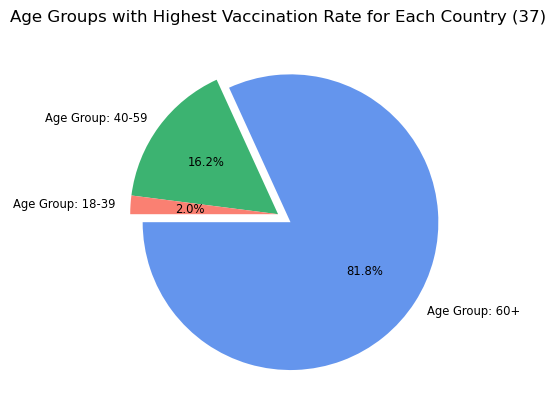

In [27]:
#pie plot

labels = 'Age Group: 60+', 'Age Group: 40-59', 'Age Group: 18-39'

#divided the number of countries in each age group by total number of countries "37". 30/37, 6/37, 1,37
sizes = [81, 16, 2]

explode = (0.1, 0, 0)

fig_age_country, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=['cornflowerblue','mediumseagreen','salmon'], startangle=180, textprops={'size': 'smaller'}, radius=1)
plt.title('Age Groups with Highest Vaccination Rate for Each Country (37)')
fig_age_country.savefig('../Images/Age_group_vac_rate.jpeg')

plt.show()


In [28]:
clean_df.loc[:, 'fully_partial_diff'] = clean_df['people_fully_vaccinated_per_hundred'].sub(clean_df['people_vaccinated_per_hundred'], axis = 0)
full_partial_col = clean_df.loc[:, 'fully_partial_diff']
full_partial_col

C:\Users\noebl\AppData\Local\Temp\ipykernel_19900\2052697840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.loc[:, 'fully_partial_diff'] = clean_df['people_fully_vaccinated_per_hundred'].sub(clean_df['people_vaccinated_per_hundred'], axis = 0)


0     -13.567589
1     -10.889940
2     -12.302193
3     -13.845569
8      -2.841850
         ...    
136    -6.064825
137    -7.126250
138    -6.479444
139    -4.602917
140    -4.224687
Name: fully_partial_diff, Length: 137, dtype: float64

In [29]:
clean_df.loc[:, 'partial_booster_diff'] = clean_df['people_vaccinated_per_hundred'].sub(clean_df['people_with_booster_per_hundred'], axis = 0)
partial_booster_col = clean_df.loc[:, 'partial_booster_diff']
partial_booster_col

C:\Users\noebl\AppData\Local\Temp\ipykernel_19900\164125935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.loc[:, 'partial_booster_diff'] = clean_df['people_vaccinated_per_hundred'].sub(clean_df['people_with_booster_per_hundred'], axis = 0)


0      36.219298
1      32.197324
2      17.478909
3      10.804680
8      18.672948
         ...    
136    31.498899
137    61.487578
138    41.318125
139    30.457917
140    27.122326
Name: partial_booster_diff, Length: 137, dtype: float64

In [30]:
clean_df.loc[:, 'full_booster_diff'] = clean_df['people_fully_vaccinated_per_hundred'].sub(clean_df['people_with_booster_per_hundred'], axis = 0)
full_booster_col = clean_df.loc[:, 'full_booster_diff']
full_booster_col

C:\Users\noebl\AppData\Local\Temp\ipykernel_19900\1424400867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.loc[:, 'full_booster_diff'] = clean_df['people_fully_vaccinated_per_hundred'].sub(clean_df['people_with_booster_per_hundred'], axis = 0)


0      22.651709
1      21.307384
2       5.176716
3      -3.040889
8      15.831098
         ...    
136    25.434073
137    54.361328
138    34.838681
139    25.855000
140    22.897639
Name: full_booster_diff, Length: 137, dtype: float64

In [31]:
clean_diff_df= clean_df

In [32]:
#clean_diff_df = clean_diff_df.drop('Full Partial', axis=1)
clean_diff_df

,location,Grouped_Age,people_fully_vaccinated_per_hundred,people_vaccinated_per_hundred,people_with_booster_per_hundred,fully_partial_diff,partial_booster_diff,full_booster_diff
0,Argentina,0-17,34.212455,47.780044,11.560745,-13.567589,36.219298,22.651709
1,Argentina,18-39,49.967750,60.857690,28.660366,-10.889940,32.197324,21.307384
2,Argentina,40-59,50.771840,63.074033,45.595124,-12.302193,17.478909,5.176716
3,Argentina,60+,52.452394,66.297962,55.493283,-13.845569,10.804680,-3.040889
8,Austria,0-17,24.246686,27.088536,8.415588,-2.841850,18.672948,15.831098
...,...,...,...,...,...,...,...,...
136,Spain,60+,79.136259,85.201084,53.702185,-6.064825,31.498899,25.434073
137,Sweden,0-17,57.722031,64.848281,3.360703,-7.126250,61.487578,54.361328
138,Sweden,18-39,58.691944,65.171389,23.853264,-6.479444,41.318125,34.838681
139,Sweden,40-59,72.737292,77.340208,46.882292,-4.602917,30.457917,25.855000


In [34]:
top_countries = clean_diff_df.sort_values(['people_fully_vaccinated_per_hundred', 'people_vaccinated_per_hundred', 'people_with_booster_per_hundred'], ascending=False)
top_countries.head(5)

,location,Grouped_Age,people_fully_vaccinated_per_hundred,people_vaccinated_per_hundred,people_with_booster_per_hundred,fully_partial_diff,partial_booster_diff,full_booster_diff
80,Jersey,60+,98.085578,99.588171,86.340759,-1.502592,13.247412,11.744820
66,Ireland,60+,90.021897,94.505638,62.248245,-4.483741,32.257394,27.773652
79,Jersey,40-59,87.027467,91.893455,62.516360,-4.865987,29.377094,24.511107
70,Israel,60+,84.775923,90.594284,67.421350,-5.818361,23.172934,17.354573
100,Malta,60+,83.900215,88.137778,55.182312,-4.237563,32.955466,28.717903


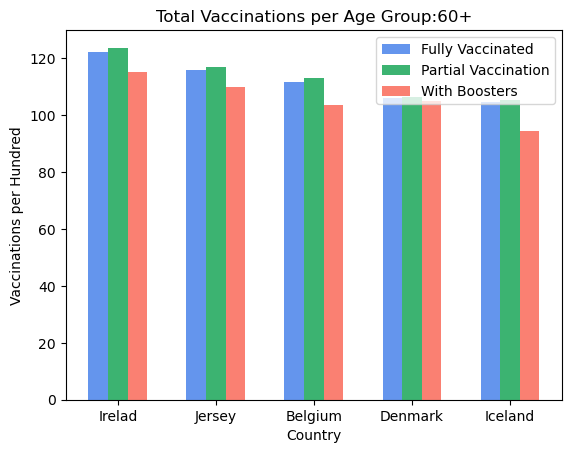

In [35]:
# Create a sample DataFrame with two rows and three columns
# Create a sample DataFrame with five rows and three columns
data = {'Country': ['Irelad', 'Jersey', 'Belgium', 'Denmark', 'Iceland'],
        'Fully Vac': [122.3, 116.0, 111.70, 106.17, 104.78],
        'Partial Vac': [123.76, 117.0 ,113.21 ,106.31, 105.36],
        'Boosters': [115.33, 110.00, 103.72, 104.94, 94.33]}
df = pd.DataFrame(data)

# Set the width of the bars
bar_width = 0.2

# Set the x locations for the groups
x = np.arange(len(df['Country']))

# Create the bar chart
plt.bar(x - bar_width, df['Fully Vac'], width=bar_width, label='Fully Vaccinated', color='cornflowerblue')
plt.bar(x, df['Partial Vac'], width=bar_width, label='Partial Vaccination', color='mediumseagreen')
plt.bar(x + bar_width, df['Boosters'], width=bar_width, label='With Boosters', color='salmon')

plt.xlabel('Country')
plt.ylabel('Vaccinations per Hundred')
plt.title('Total Vaccinations per Age Group:60+')
plt.xticks(x, df['Country'])
plt.legend()
plt.savefig('../Images/top_5.jpeg')


plt.show()

In [38]:
top_countries.describe()

,people_fully_vaccinated_per_hundred,people_vaccinated_per_hundred,people_with_booster_per_hundred,fully_partial_diff,partial_booster_diff,full_booster_diff
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,55.677662,60.811881,29.758591,-5.134219,31.053290,25.919071
std,21.544148,22.376890,21.410037,3.763534,11.107299,9.870572
min,1.847083,1.953000,0.000000,-17.202386,1.856917,-3.040889
25%,42.487541,47.609590,9.190000,-6.542727,24.639132,21.307384
50%,61.171136,65.846769,29.462622,-3.997360,31.040284,25.494439
75%,72.737292,78.099149,49.345114,-2.779573,36.751635,31.795072
max,98.085578,99.588171,86.340759,0.790769,62.398105,54.361328


In [40]:
top_full_rows = top_countries.head(5)
top_full_diff = top_full_rows['people_fully_vaccinated_per_hundred'].tolist()
top_full_diff

[98.085578125,
 90.02189716312057,
 87.02746736292427,
 84.77592311583207,
 83.90021505376345]

In [41]:
bottom_full = clean_diff_df.sort_values('people_fully_vaccinated_per_hundred', ascending=True)
bottom_full.head(5)

,location,Grouped_Age,people_fully_vaccinated_per_hundred,people_vaccinated_per_hundred,people_with_booster_per_hundred,fully_partial_diff,partial_booster_diff,full_booster_diff
16,Bulgaria,0-17,1.847083,1.953000,0.096083,-0.105917,1.856917,1.751000
24,Croatia,0-17,5.117643,5.935626,0.176348,-0.817983,5.759278,4.941295
121,Romania,0-17,5.799590,6.195246,0.275164,-0.395656,5.920082,5.524426
129,Slovenia,0-17,7.278067,8.050000,0.188824,-0.771933,7.861176,7.089244
105,Norway,0-17,8.550741,22.629630,0.000000,-14.078889,22.629630,8.550741


In [42]:
bottom_full.describe()

,people_fully_vaccinated_per_hundred,people_vaccinated_per_hundred,people_with_booster_per_hundred,fully_partial_diff,partial_booster_diff,full_booster_diff
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,55.677662,60.811881,29.758591,-5.134219,31.053290,25.919071
std,21.544148,22.376890,21.410037,3.763534,11.107299,9.870572
min,1.847083,1.953000,0.000000,-17.202386,1.856917,-3.040889
25%,42.487541,47.609590,9.190000,-6.542727,24.639132,21.307384
50%,61.171136,65.846769,29.462622,-3.997360,31.040284,25.494439
75%,72.737292,78.099149,49.345114,-2.779573,36.751635,31.795072
max,98.085578,99.588171,86.340759,0.790769,62.398105,54.361328


In [43]:
bottom_full_rows = bottom_full.head(5)
bottom_full_diff = bottom_full_rows['people_fully_vaccinated_per_hundred'].tolist()
bottom_full_diff

[1.8470833333333334,
 5.117643312101911,
 5.799590163934427,
 7.278067226890757,
 8.55074074074074]

In [44]:
top_partial = clean_diff_df.sort_values('people_vaccinated_per_hundred', ascending=False)
top_partial.head(5)

,location,Grouped_Age,people_fully_vaccinated_per_hundred,people_vaccinated_per_hundred,people_with_booster_per_hundred,fully_partial_diff,partial_booster_diff,full_booster_diff
80,Jersey,60+,98.085578,99.588171,86.340759,-1.502592,13.247412,11.744820
66,Ireland,60+,90.021897,94.505638,62.248245,-4.483741,32.257394,27.773652
79,Jersey,40-59,87.027467,91.893455,62.516360,-4.865987,29.377094,24.511107
70,Israel,60+,84.775923,90.594284,67.421350,-5.818361,23.172934,17.354573
15,Belgium,60+,83.324838,88.249011,58.894838,-4.924173,29.354173,24.430000


In [45]:
top_partial.describe()

,people_fully_vaccinated_per_hundred,people_vaccinated_per_hundred,people_with_booster_per_hundred,fully_partial_diff,partial_booster_diff,full_booster_diff
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,55.677662,60.811881,29.758591,-5.134219,31.053290,25.919071
std,21.544148,22.376890,21.410037,3.763534,11.107299,9.870572
min,1.847083,1.953000,0.000000,-17.202386,1.856917,-3.040889
25%,42.487541,47.609590,9.190000,-6.542727,24.639132,21.307384
50%,61.171136,65.846769,29.462622,-3.997360,31.040284,25.494439
75%,72.737292,78.099149,49.345114,-2.779573,36.751635,31.795072
max,98.085578,99.588171,86.340759,0.790769,62.398105,54.361328


In [46]:
top_partial_rows = top_partial.head(5)
top_partial_diff = top_partial_rows['people_vaccinated_per_hundred'].tolist()
top_partial_diff

[99.58817054263567,
 94.50563829787234,
 91.89345454545456,
 90.59428426909459,
 88.2490107913669]

In [47]:
bottom_partial = clean_diff_df.sort_values('people_vaccinated_per_hundred', ascending=True)
bottom_partial.head(5)

,location,Grouped_Age,people_fully_vaccinated_per_hundred,people_vaccinated_per_hundred,people_with_booster_per_hundred,fully_partial_diff,partial_booster_diff,full_booster_diff
16,Bulgaria,0-17,1.847083,1.953000,0.096083,-0.105917,1.856917,1.751000
24,Croatia,0-17,5.117643,5.935626,0.176348,-0.817983,5.759278,4.941295
121,Romania,0-17,5.799590,6.195246,0.275164,-0.395656,5.920082,5.524426
129,Slovenia,0-17,7.278067,8.050000,0.188824,-0.771933,7.861176,7.089244
40,Estonia,0-17,12.578613,13.369562,1.148467,-0.790949,12.221095,11.430146


In [48]:
bottom_partial_rows = bottom_partial.head(5)
bottom_partial_diff = bottom_partial_rows['people_vaccinated_per_hundred'].tolist()
bottom_partial_diff

[1.953, 5.935626326963906, 6.195245901639344, 8.05, 13.36956204379562]

In [49]:
top_booster = clean_diff_df.sort_values('people_with_booster_per_hundred', ascending=False)
top_booster.head(5)

,location,Grouped_Age,people_fully_vaccinated_per_hundred,people_vaccinated_per_hundred,people_with_booster_per_hundred,fully_partial_diff,partial_booster_diff,full_booster_diff
80,Jersey,60+,98.085578,99.588171,86.340759,-1.502592,13.247412,11.744820
112,Peru,60+,79.725383,82.540540,72.846544,-2.815156,9.693996,6.878839
111,Peru,40-59,77.848414,80.452953,70.442936,-2.604539,10.010017,7.405478
70,Israel,60+,84.775923,90.594284,67.421350,-5.818361,23.172934,17.354573
79,Jersey,40-59,87.027467,91.893455,62.516360,-4.865987,29.377094,24.511107


In [50]:
top_booster_rows = top_booster.head(5)
top_booster_diff = top_booster_rows['people_with_booster_per_hundred'].tolist()
top_booster_diff

[86.34075862068967,
 72.84654377880184,
 70.44293577981651,
 67.42135021097047,
 62.516360153256706]

In [51]:
top_booster.describe()

,people_fully_vaccinated_per_hundred,people_vaccinated_per_hundred,people_with_booster_per_hundred,fully_partial_diff,partial_booster_diff,full_booster_diff
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,55.677662,60.811881,29.758591,-5.134219,31.053290,25.919071
std,21.544148,22.376890,21.410037,3.763534,11.107299,9.870572
min,1.847083,1.953000,0.000000,-17.202386,1.856917,-3.040889
25%,42.487541,47.609590,9.190000,-6.542727,24.639132,21.307384
50%,61.171136,65.846769,29.462622,-3.997360,31.040284,25.494439
75%,72.737292,78.099149,49.345114,-2.779573,36.751635,31.795072
max,98.085578,99.588171,86.340759,0.790769,62.398105,54.361328


In [52]:
bottom_booster = clean_diff_df.sort_values('people_with_booster_per_hundred', ascending=True)
bottom_booster.head(5)

,location,Grouped_Age,people_fully_vaccinated_per_hundred,people_vaccinated_per_hundred,people_with_booster_per_hundred,fully_partial_diff,partial_booster_diff,full_booster_diff
105,Norway,0-17,8.550741,22.629630,0.000000,-14.078889,22.629630,8.550741
16,Bulgaria,0-17,1.847083,1.953000,0.096083,-0.105917,1.856917,1.751000
36,Denmark,0-17,36.712757,41.430565,0.120033,-4.717807,41.310532,36.592724
24,Croatia,0-17,5.117643,5.935626,0.176348,-0.817983,5.759278,4.941295
129,Slovenia,0-17,7.278067,8.050000,0.188824,-0.771933,7.861176,7.089244


In [53]:
bottom_booster_rows = bottom_booster.head(5)
bottom_booster_diff = bottom_booster_rows['people_with_booster_per_hundred'].tolist()
bottom_booster_diff

[0.0,
 0.09608333333333333,
 0.12003322259136211,
 0.17634819532908705,
 0.1888235294117647]

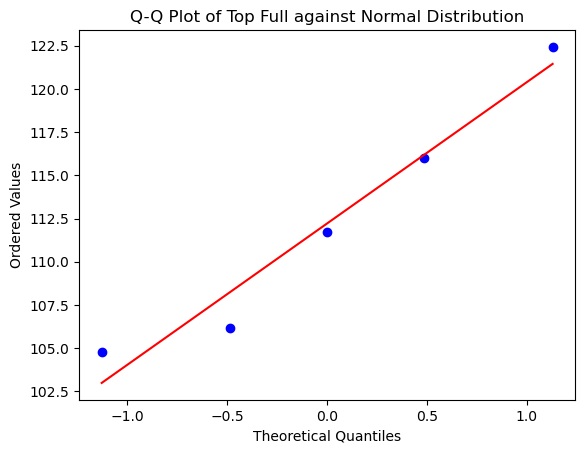

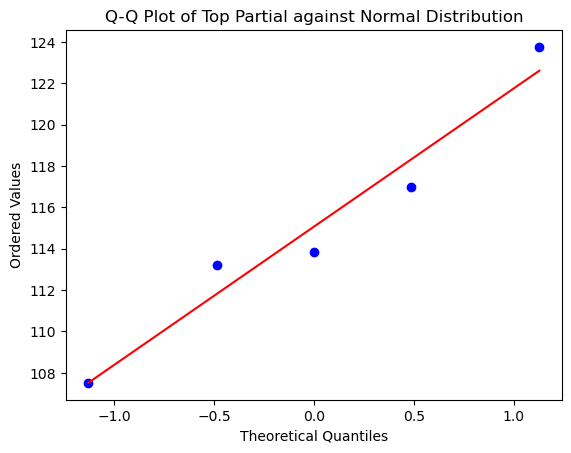

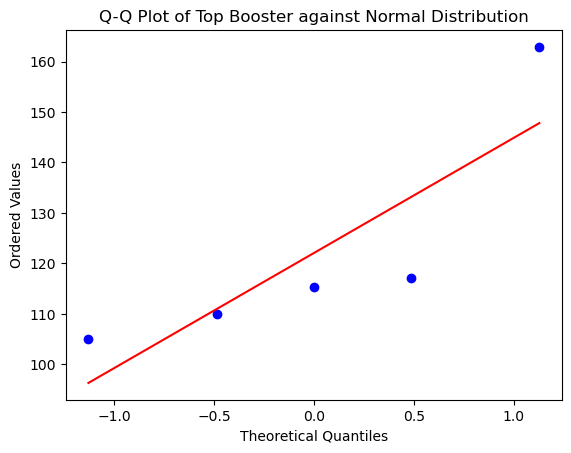

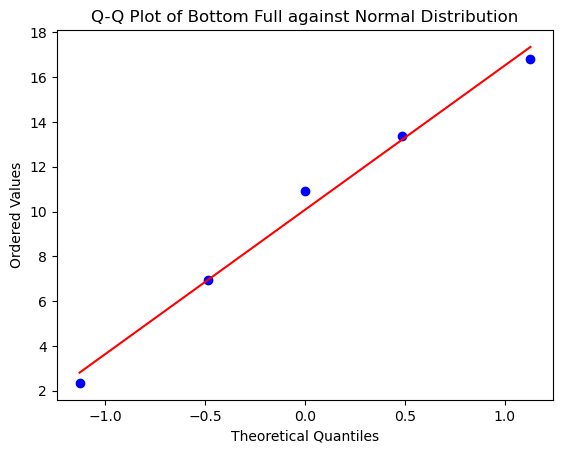

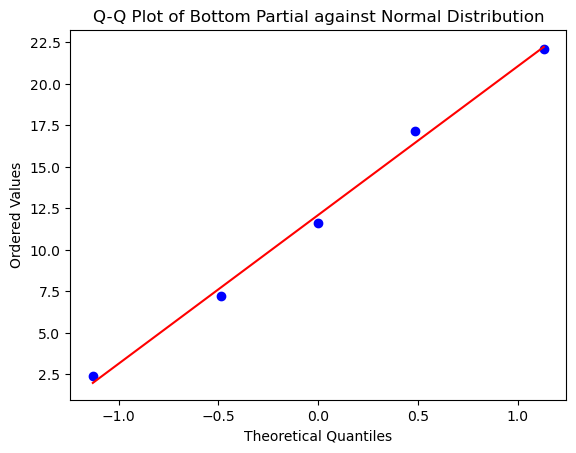

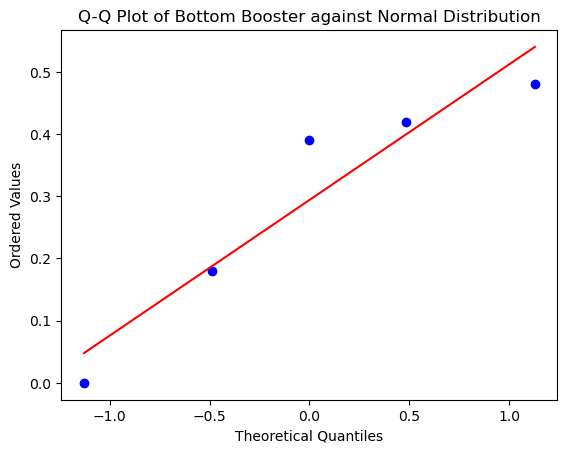

In [54]:
data_qq = {
    'Top Full': [122.43, 116.0, 111.7, 106.17, 104.78], 
    'Top Partial': [123.76, 117.0, 113.85, 113.21, 107.51],
    'Top Booster': [162.9, 117.12, 115.33, 110.0, 104.94],
    'Bottom Full': [2.35, 6.94, 10.93, 13.36, 16.82],
    'Bottom Partial': [2.41, 7.23, 11.64, 17.15, 22.13],
    'Bottom Booster':[0.0, 0.18, 0.39, 0.42, 0.48]
}

# Create Q-Q plots for each column
for col in data_qq:
    plt.figure()
    stats.probplot(data_qq[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col} against Normal Distribution')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Ordered Values')

plt.show()

In [55]:
from scipy.stats import f_oneway

# Perform ANOVA test
f_statistic, p_value = f_oneway(data['Fully Vac'], data['Partial Vac'], data['Boosters'])

# Print the results
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Statistically significant differences exist between the columns.")
else:
    print("No statistically significant differences between the columns.")


F-Statistic: 1.441614029293978
P-Value: 0.27472909579231336
No statistically significant differences between the columns.


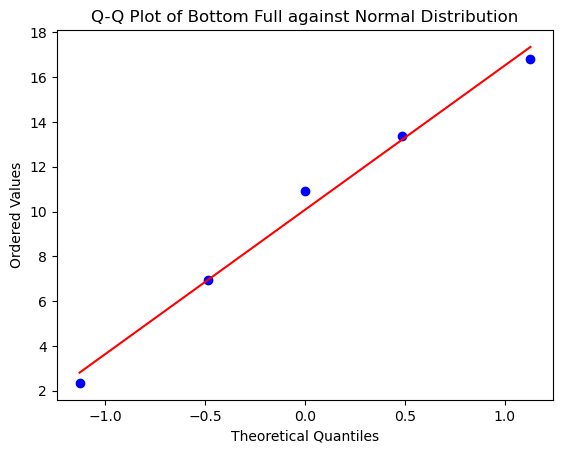

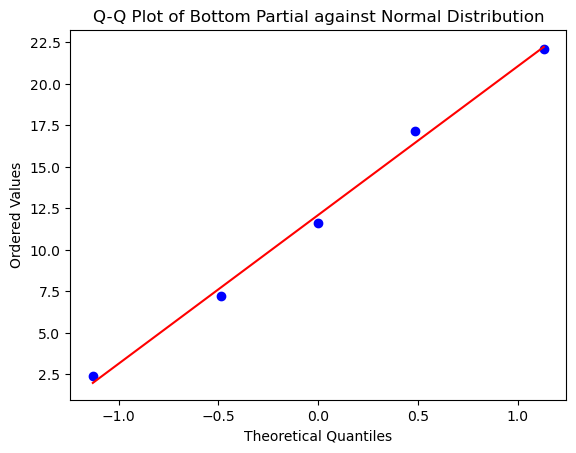

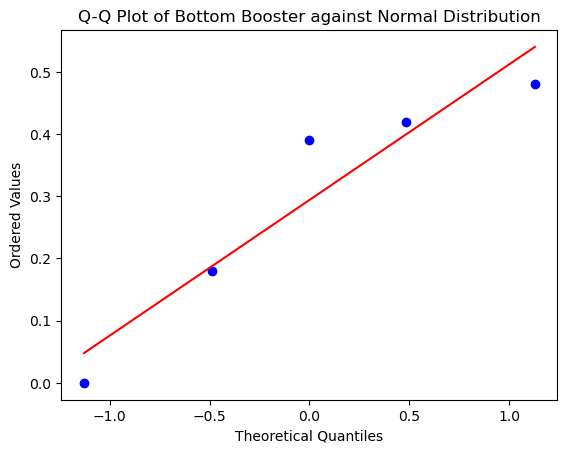

In [56]:
data_2= {
    'Bottom Full': [2.35, 6.94, 10.93, 13.36, 16.82],
    'Bottom Partial': [2.41, 7.23, 11.64, 17.15, 22.13],
    'Bottom Booster':[0.0, 0.18, 0.39, 0.42, 0.48]
}

# Create Q-Q plots for each column
for col in data_2:
    plt.figure()
    stats.probplot(data_qq[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col} against Normal Distribution')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Ordered Values')

plt.show()

In [57]:
bottom_countries = clean_diff_df.sort_values(['people_fully_vaccinated_per_hundred', 'people_vaccinated_per_hundred', 'people_with_booster_per_hundred'], ascending=True)
bottom_countries.head(5)

,location,Grouped_Age,people_fully_vaccinated_per_hundred,people_vaccinated_per_hundred,people_with_booster_per_hundred,fully_partial_diff,partial_booster_diff,full_booster_diff
16,Bulgaria,0-17,1.847083,1.953000,0.096083,-0.105917,1.856917,1.751000
24,Croatia,0-17,5.117643,5.935626,0.176348,-0.817983,5.759278,4.941295
121,Romania,0-17,5.799590,6.195246,0.275164,-0.395656,5.920082,5.524426
129,Slovenia,0-17,7.278067,8.050000,0.188824,-0.771933,7.861176,7.089244
105,Norway,0-17,8.550741,22.629630,0.000000,-14.078889,22.629630,8.550741


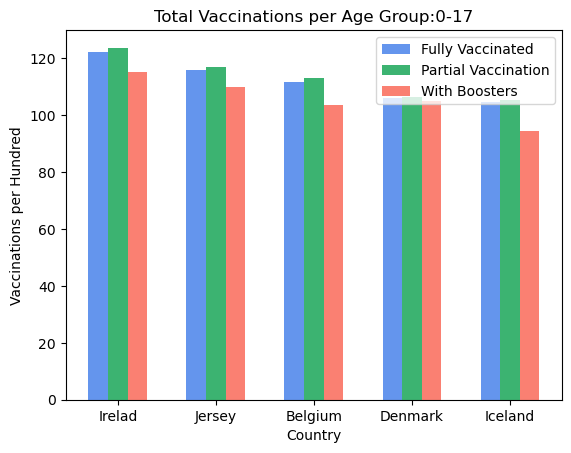

In [58]:
data_3 = {'Country': ['Bulgaria', 'Romania', 'Slovenia', 'Norway', 'Estonia'],
        'Fully Vac': [2.35,6.94,10.93,13.36,16.82],
        'Partial Vac': [2.41,7.23,11.64,31.40,17.15],
        'Boosters': [0.18,0.39,0.42,0.00,1.85]}
df3 = pd.DataFrame(data)

# Set the width of the bars
bar_width = 0.2

# Set the x locations for the groups
x = np.arange(len(df['Country']))

# Create the bar chart
plt.bar(x - bar_width, df3['Fully Vac'], width=bar_width, label='Fully Vaccinated', color='cornflowerblue')
plt.bar(x, df3['Partial Vac'], width=bar_width, label='Partial Vaccination', color='mediumseagreen')
plt.bar(x + bar_width, df3['Boosters'], width=bar_width, label='With Boosters', color='salmon')

plt.xlabel('Country')
plt.ylabel('Vaccinations per Hundred')
plt.title('Total Vaccinations per Age Group:0-17')
plt.xticks(x, df['Country'])
plt.legend()
plt.savefig('../Images/seventeen.jpeg')


plt.show()

In [59]:
# Perform ANOVA test
f_statistic, p_value = f_oneway(data_3['Fully Vac'], data_3['Partial Vac'], data_3['Boosters'])

# Print the results
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Statistically significant differences exist between the columns.")
else:
    print("No statistically significant differences between the columns.")


F-Statistic: 4.546103977907142
P-Value: 0.033912140977841995
Statistically significant differences exist between the columns.
